# 0204 - EDA 
- 작성: 이슬
- 프로젝트 선정후 각자 데이터를 파악하는 작업을 하는 기간에 작성한 노트북
    - 허깅페이스에서 데이터셋을 불러오고, stream 방식으로 가져온 데이터를 EDA 시도했으나 어려움이 있었고, 데이터 다운받는 부분까지 완료후 미팅 참여 

In [3]:
import GPUtil

gpus = GPUtil.getGPUs()
for gpu in gpus:
    print(f"GPU Name: {gpu.name}")
    print(f"Memory Free: {gpu.memoryFree} MB")
    print(f"Memory Used: {gpu.memoryUsed} MB")

GPU Name: Tesla T4
Memory Free: 15109.0 MB
Memory Used: 0.0 MB


In [2]:
# !pip install gputil

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=adaa24dcccf87798da4b20c012bfc510f767a50f1b7056a14cdb70078d11771a
  Stored in directory: /aiffel/.cache/pip/wheels/2b/b5/24/fbb56595c286984f7315ee31821d6121e1b9828436021a88b3
Successfully built gputil


# Load data

## Dataset Description : The Quick Draw Dataset
- **collection of millions of drawings across 300+ categories**
    - contributed by players of Quick, Draw! 
- The drawings were captured as **timestamped vectors**
- **tagged** with metadata 
    - **what the player was asked to draw**
    - **in which country the player was located**

## File Description
- Two versions of the data
- The raw data : the exact input recorded from the user drawing,
- the simplified version : removed unnecessary points from the vector information 
    - sample_submission.csv - a sample submission file in the correct format
    - test_raw.csv - the test data in the raw vector format
    - test_simplified.csv - the test data in the simplified vector format
    - train_raw.zip - the training data in the raw vector format; one csv file per word
    - train_simplified.zip - the training data in the simplified vector format; one csv file per word

## issue
- [캐글 원본 데이터셋](https://www.kaggle.com/competitions/quickdraw-doodle-recognition/data)의 용량이 너무 커서 압축해제에서 서버가 다운되는 문제가 있음
    - simplified 버전을 사용해서 EDA를 시도
    - 안될경우 캐글 데이터셋과 동일한 [hugging face의 데이터셋](https://huggingface.co/datasets/quickdraw) 사용 시도

In [1]:
!pip install kaggle --upgrade # kaggle 라이브러리 설치 코드

     |████████████████████████████████| 84 kB 3.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 11.1 MB/s            
  Created wheel for kaggle: filename=kaggle-1.6.4-py3-none-any.whl size=111947 sha256=3c6086a451d2f5e872ae45266f0c629477eaef0f8e06f35af4f8261be2338aea
  Stored in directory: /aiffel/.cache/pip/wheels/43/27/0f/1c731177a7701222d1af0ef01b165f1b2a2580452a056fde07
Successfully built kaggle


In [2]:
# kaggle API 코드(kaggle.json)파일 경로 인식시켜 주기 위한 코드
import os
cur_dir = os.getcwd()
os.environ['KAGGLE_CONFIG_DIR'] = cur_dir

In [ ]:
# # data라는 폴더에 컴피티션에서 제공하는 데이터를 다운 받는 코드
# !kaggle competitions download -c quickdraw-doodle-recognition -p ./data

In [22]:
# check the available files of the dataset
!kaggle competitions files -c quickdraw-doodle-recognition

name                                           size  creationDate         
--------------------------------------------  -----  -------------------  
train_raw/backpack.csv                        594MB  2019-12-15 23:30:21  
train_raw/ambulance.csv                       905MB  2019-12-15 23:30:21  
train_raw/angel.csv                           908MB  2019-12-15 23:30:21  
train_raw/bandage.csv                         571MB  2019-12-15 23:30:21  
train_raw/arm.csv                             455MB  2019-12-15 23:30:21  
train_raw/banana.csv                          915MB  2019-12-15 23:30:21  
train_raw/asparagus.csv                       667MB  2019-12-15 23:30:21  
train_raw/ant.csv                             383MB  2019-12-15 23:30:21  
train_raw/axe.csv                             392MB  2019-12-15 23:30:21  
train_raw/apple.csv                           424MB  2019-12-15 23:30:21  
train_raw/barn.csv                            780MB  2019-12-15 23:30:21  
train_raw/airplane.csv   

In [23]:
# download the simplified versions (files under train_simplified/)
!kaggle competitions download -c quickdraw-doodle-recognition -f "train_simplified/*" -p ./data

404 - Not Found - Not found


In [20]:
# get the list of available datasets and their file paths for the competition.
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           7787        187  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          13924        253  1.0              
willianoliveiragibin/qs-top-100-universities                       QS top 100 universities                              4KB  2024-01-21 20:40:02            944         24  1.0              
elvinrustam/ebay-laptops-and-netbooks-sales       

In [21]:
!kaggle config view

Configuration values from /aiffel/aiffel/Sidethon
- username: seulwithlove
- path: None
- proxy: None
- competition: None


In [24]:
# download the simplified versions (files under train_simplified/)
!kaggle competitions download -c quickdraw-doodle-recognition -f "/train_simplified/*" -p ./data

404 - Not Found - Not found


- 어떤 부분이 문제인지 모르겠지만, simplified 파일만 다운받는게 쉽지 않다.
- 허깅페이스 데이터셋을 다운받아본다

---

### Hugging face dataset
[hugging face의 데이터셋](https://huggingface.co/datasets/quickdraw)
- 사용할 데이터 : `preprocessed_simplified_drawings`

In [1]:
# # install hugging face dataset library
!pip install -U datasets

In [4]:
from datasets import load_dataset

dataset_id = "quickdraw"

# ds_train = load_dataset("quickdraw", "preprocessed_simplified_drawings")
ds_train = load_dataset("quickdraw", "preprocessed_simplified_drawings", split='train', streaming=True)

/opt/conda/lib/python3.9/site-packages/datasets/load.py:1429: FutureWarning: The repository for quickdraw contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/quickdraw
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(



# EDA
- reference : [kaggle notebook](https://www.kaggle.com/code/dimitreoliveira/quick-draw-simple-eda)

In [5]:
import os
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

pd.options.display.max_rows = 20
sns.set(style="darkgrid")
%matplotlib inline

In [6]:
ds_train

IterableDataset({
    features: ['key_id', 'word', 'recognized', 'timestamp', 'countrycode', 'drawing'],
    n_shards: 345
})

In [22]:
# 데이터셋의 100개만 가져와서 확인
ds_tmp = ds_train.shuffle(buffer_size=1000).take(100)

# Convert the dataset elements to a list of dictionaries
data_list = []
for file in ds_tmp:
    data_list.append(file)

# Create a DataFrame from the list of dictionaries
train_sample = pd.DataFrame(data_list)
train_sample.set_index('key_id', inplace=True)

print('Train number of rows:', train_sample.shape[0])
print('Train number of columns:', train_sample.shape[1])
print('Train set features:', train_sample.columns.values)

Train number of rows: 100
Train number of columns: 5
Train set features: ['word' 'recognized' 'timestamp' 'countrycode' 'drawing']


In [23]:
train_sample.head()

,word,recognized,timestamp,countrycode,drawing
key_id,,,,,
5975940913954816,36,True,2017-03-23 11:24:25,US,"{'x': [[229, 198, 153, 131, 107, 76, 48, 22, 1..."
5516262492864512,36,True,2017-03-08 20:52:56,US,"{'x': [[251, 242, 225, 194, 171, 153, 126, 75,..."
4988264853274624,36,True,2017-01-28 17:38:48,SK,"{'x': [[42, 67, 83, 101, 113, 135, 144, 169, 1..."
5539483573288960,36,True,2017-01-29 00:34:06,US,"{'x': [[43, 32, 23, 1, 0, 21, 44, 68, 165, 189..."
5102218288037888,36,True,2017-01-23 18:06:19,GB,"{'x': [[0, 12, 39, 95, 139, 163, 175, 190, 216..."


In [25]:
# check the label count
count_gp = train_sample.groupby(['word']).size().reset_index(name='count').sort_values('count', ascending=False)
top_10 = count_gp[:10]
bottom_10 = count_gp[count_gp.shape[0]-10:count_gp.shape[0]]

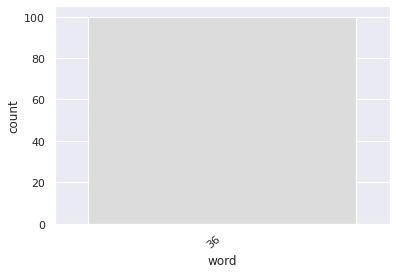

In [26]:
# The top 10 words
ax_t10 = sns.barplot(x="word", y="count", data=top_10, palette="coolwarm")
ax_t10.set_xticklabels(ax_t10.get_xticklabels(), rotation=40, ha="right")
plt.show()

- 데이터셋을 보는게 너무 어려워서 파일을 가져오는걸 시도해본다

In [27]:
ds_train = load_dataset("quickdraw", "preprocessed_simplified_drawings", split='train')

/opt/conda/lib/python3.9/site-packages/datasets/load.py:1429: FutureWarning: The repository for quickdraw contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/quickdraw
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/50426266 [00:00<?, ? examples/s]

In [28]:
ds_train.info

DatasetInfo(description='The Quick Draw Dataset is a collection of 50 million drawings across 345 categories, contributed by players of the game Quick, Draw!.\nThe drawings were captured as timestamped vectors, tagged with metadata including what the player was asked to draw and in which country the player was located.\n', citation='@article{DBLP:journals/corr/HaE17,\n  author    = {David Ha and\n               Douglas Eck},\n  title     = {A Neural Representation of Sketch Drawings},\n  journal   = {CoRR},\n  volume    = {abs/1704.03477},\n  year      = {2017},\n  url       = {http://arxiv.org/abs/1704.03477},\n  archivePrefix = {arXiv},\n  eprint    = {1704.03477},\n  timestamp = {Mon, 13 Aug 2018 16:48:30 +0200},\n  biburl    = {https://dblp.org/rec/bib/journals/corr/HaE17},\n  bibsource = {dblp computer science bibliography, https://dblp.org}\n}\n', homepage='https://quickdraw.withgoogle.com/data', license='CC BY 4.0', features={'key_id': Value(dtype='string', id=None), 'word': Cla

In [29]:
len(ds_train)

50426266

In [30]:
ds_train.head()

AttributeError: 'Dataset' object has no attribute 'head'